In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
import popoff
# from pop_off_functions import save_figure
import pop_off_plotting as pop
import pop_off_functions as pof
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
# from utils.utils_funcs import d_prime

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [53]:
msm = MultiSessionModel(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

## label URH and ARM
for ss in msm.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [6]:
session = msm.sessions[0]
session

instance Mouse J064, run 10 of Session class

<Figure size 7200x7200 with 0 Axes>

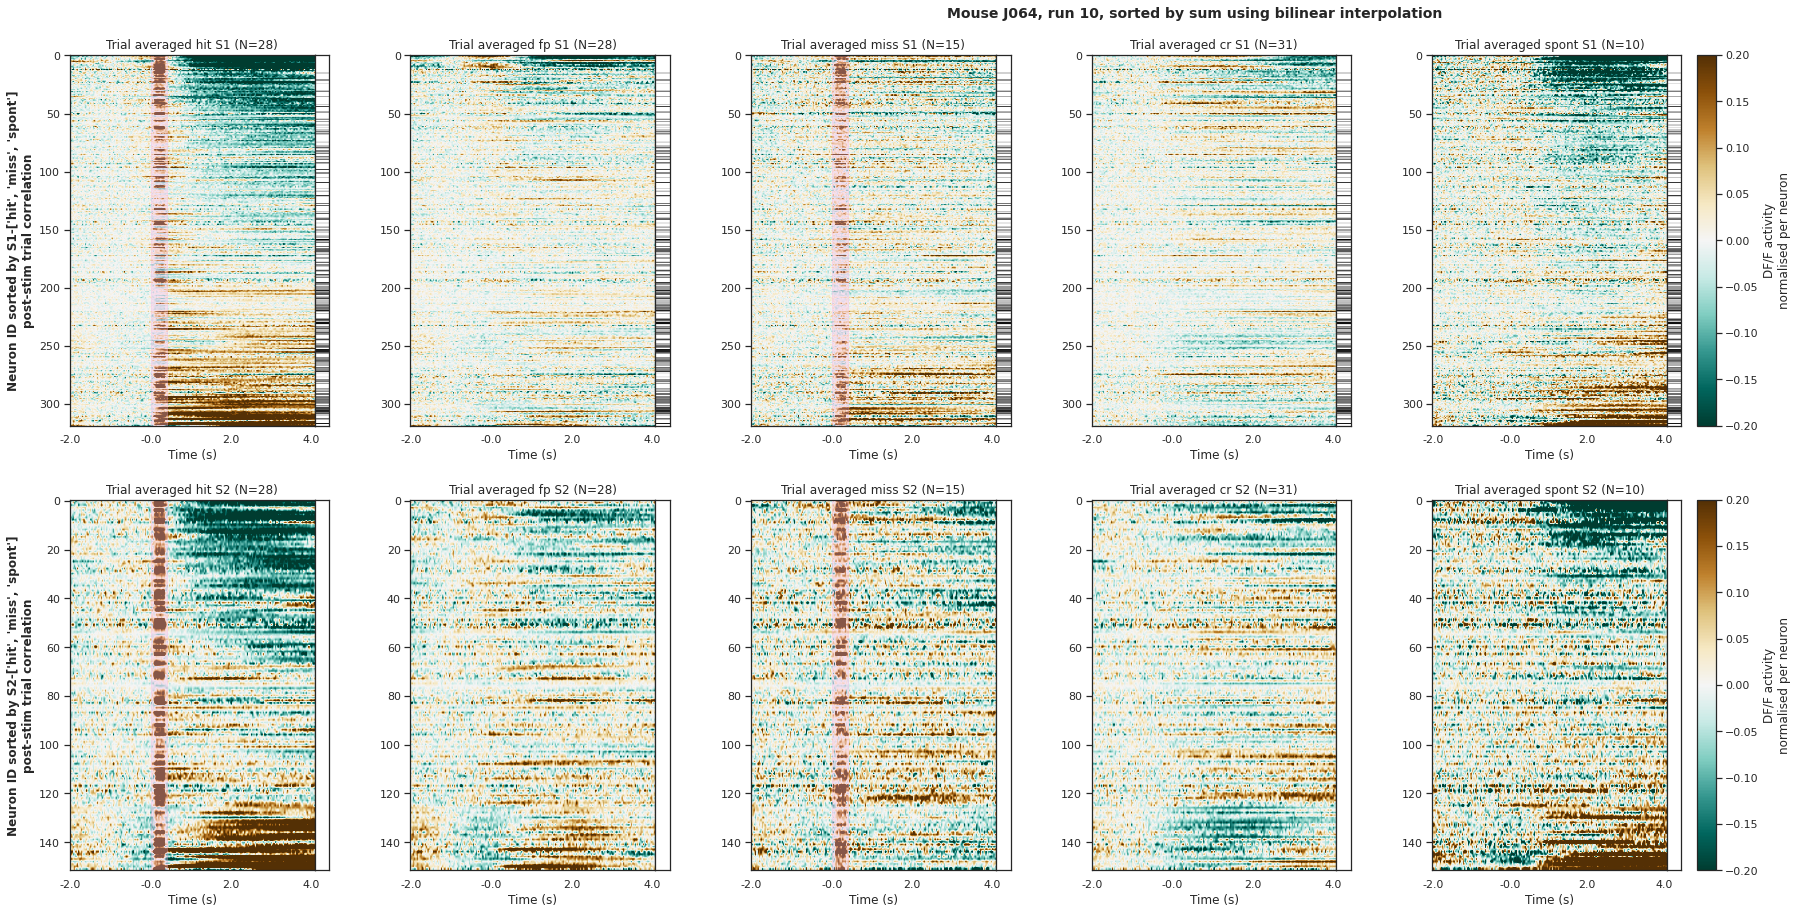

In [45]:
plt.figure(figsize=(100,100))
_ = pop.plot_raster_plots_trial_types_one_session(session, filter_150_stim=True,
          sort_tt_list=['hit', 'miss', 'spont'], sorting_method='sum',
                                                 imshow_interpolation='bilinear')
# save_figure('Figure2MATCHEDsorting_raster_bois_with150', figure_path)

In [10]:

# n_s2 = np.sum(session.s2_bool)
# # print(n_s2)
# # plot_row = 117 # Where is the cell on the plot
# for plot_row in np.arange(0,  10): #n_s2):

#     # Index of S2 cells in combined matrix
#     cell_id = np.where(session.s2_bool)[0][plot_row]
#     arr = session.behaviour_trials[cell_id, :, :]
#     arr = arr[session.outcome=='hit', :]
    
#     baseline = np.mean(arr[:, :session.pre_frames], 1)
#     arr = np.subtract(arr.T, baseline).T

#     plt.figure()
#     plt.title(cell_id)
    
#     plt.plot(session.filter_ps_time, np.mean(arr, 0))

In [11]:
# cell_id = np.where(session.s2_bool)[0][10]
# cell_id

In [165]:
(data_use_mat_norm, data_use_mat_norm_s1, data_use_mat_norm_s2, data_spont_mat_norm, ol_neurons_s1, ol_neurons_s2, outcome_arr,
        time_ticks, time_tick_labels, time_axis) = pop.normalise_raster_data(session=session, sorting_method='sum', sort_tt_list=['hit'],
                            sort_neurons=True, filter_150_stim=False)

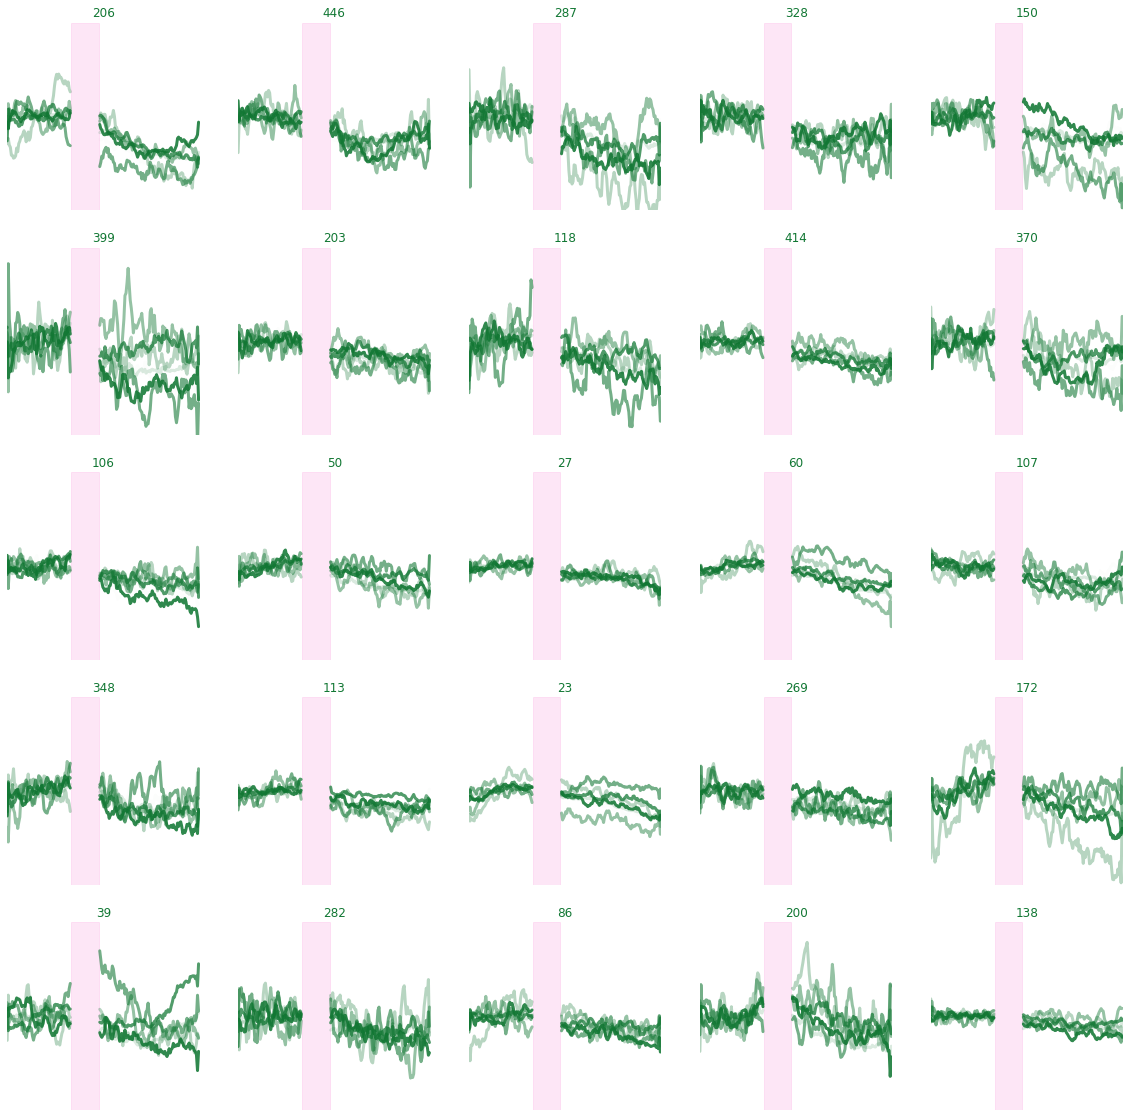

In [170]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
ind_arr = np.where(session.s2_bool)[0][ol_neurons_s2]#[::-1]
i_plot = 0
tt = 'hit'
for i_row in range(5):
    for i_col in range(5):
        cell_id_exc = ind_arr[i_plot + 0]
        _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax[i_row][i_col], plot_title=True, 
                                 plot_indiv=False, plot_total_mean=False, plot_artefact=True,
                                 ylims=(-1, 1),
                                 plot_n_cell_split=(True if tt is not 'prereward' else False))
        ax[i_row][i_col].set_title(cell_id_exc)
        i_plot += 1

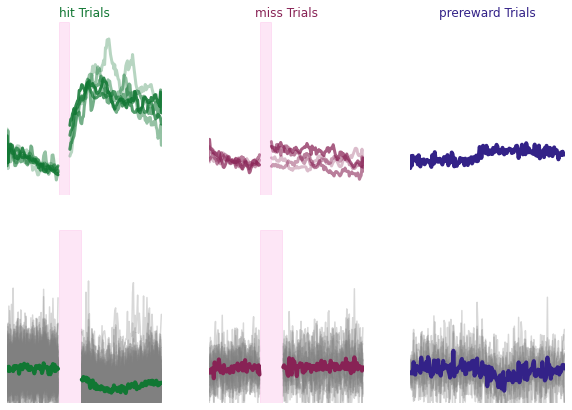

In [159]:
session = msm.sessions[0]

fig, ax = plt.subplots(2, 3, figsize=(10, 7), gridspec_kw={'wspace': 0.3})
## J064 run 10 cell 77 is a magic cell on hit trials
# It's now cell 80 

## 154 is the same but a bit cleaner but 77 doesnt 
## respond to spont rew
cell_id_exc = 163 # 163

## inhibited example:
# 403 has a big inhibitory event but also a bit on the spont
# 378 is decent
# 316 is very good but not perfect same with 302
# 192 good

cell_id_inh = 446


for i_tt, tt in enumerate(['hit', 'miss', 'prereward']):
    _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax[0][i_tt], plot_title=True, 
                             filter_150_stim=True,
                             plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True)
    _ = pop.single_cell_plot(session, cell_id=cell_id_inh, tt=[tt], ax=ax[1][i_tt], 
                             filter_150_stim=False)
    
# save_figure('Figure2ExcitedCell', figure_path)

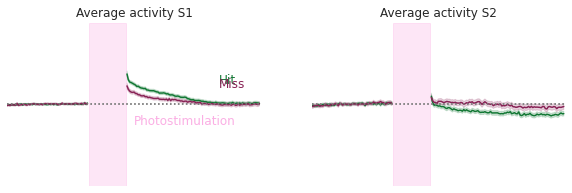

In [130]:
# for n_cells in [[5,10], [20,30], [40,50], [150]]:
for n_cells in [[5, 10, 20, 30, 40, 50, 150]]:
    tmp = pop.plot_average_tt_s1_s2(msm, n_cells, ylims=(-0.2, 0.2))


In [21]:
# pos = pof.get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='positive', prereward=False)

# neg = pof.get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='negative', prereward=False)
# # 
# np.mean(pos[session.outcome=='cr']) + np.mean(neg[session.outcome=='cr'])

In [134]:
# Used to set the alpha, should be on average across sesssion 5% of cells responding to cr trials

cr_responders = []
for session_idx in range(len(msm.linear_models)):

    session = msm.linear_models[session_idx].session
    
    n_responders = pof.get_percent_cells_responding(session, 's2', direction='positive', prereward=False)
    cr_positive = np.mean(n_responders[session.outcome=='cr'])
    
    n_responders = pof.get_percent_cells_responding(session, 's2', direction='negative', prereward=False)
    cr_negative = np.mean(n_responders[session.outcome=='cr'])
    
    cr_responders.append(cr_positive + cr_negative)
    
print(f'percentage of cells responding to CR trials is {np.round(np.mean(cr_responders), 2)}')
assert np.mean(cr_responders) < 5, 'more than 5% of cells respond to CR trials'
# print(cr_responders)

percentage of cells responding to CR trials is 4.98


In [178]:
perc_hit_dict, perc_miss_dict = {x: {} for x in ['s1', 's2']}, {x: {} for x in ['s1', 's2']}
var_perc_hit_dict, var_perc_miss_dict = {x: {} for x in ['s1', 's2']}, {x: {} for x in ['s1', 's2']}
for reg in ['s1', 's2']:
    for direction in ['positive', 'negative']:
        print(reg, direction)
        tmp = pof.transfer_dict(msm, region=reg, direction=direction)
        perc_hit_dict[reg][direction], perc_miss_dict[reg][direction], var_perc_hit_dict[reg][direction], var_perc_miss_dict[reg][direction] = tmp

s1 positive


/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/tplas/anaconda3/envs/pope/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


s1 negative
s2 positive
s2 negative


In [180]:
perc_hit_dict['s1']['positive']

{5.0: array([ 4.23197492,  6.20335821,  4.08874802,  2.85285285,  2.50626566,
         5.5952381 ,         nan, 10.03236246,  6.56862745,  6.74157303]),
 10.0: array([4.54545455, 9.01741294, 5.07131537, 3.8038038 , 2.58980785,
        5.42857143,        nan, 8.73786408, 6.2745098 , 4.556804  ]),
 20.0: array([ 5.32915361,  7.38272921,  4.99207607,  3.8038038 ,  4.5796309 ,
         8.57142857,  2.33236152, 10.19417476,  6.53594771,  6.20652755]),
 30.0: array([7.13166144, 7.89800995, 5.52033809, 3.15315315, 3.7593985 ,
        8.53174603, 4.51895044, 9.7626753 , 6.16246499, 5.36828964]),
 40.0: array([ 8.51619645,  9.73880597,  7.09191759,  3.6036036 ,  4.83351235,
         8.17460317,  6.21963071, 11.47396293,  7.45098039,  5.35045479]),
 50.0: array([ 9.28683386, 10.82089552,  7.13153724,  4.5045045 ,  7.14285714,
         8.28571429,  5.32069971, 10.87378641,  5.96078431,  6.66666667]),
 150.0: array([20.57842047, 20.20603504, 15.36023406,  7.5724373 ,  7.99056465,
        13.343465

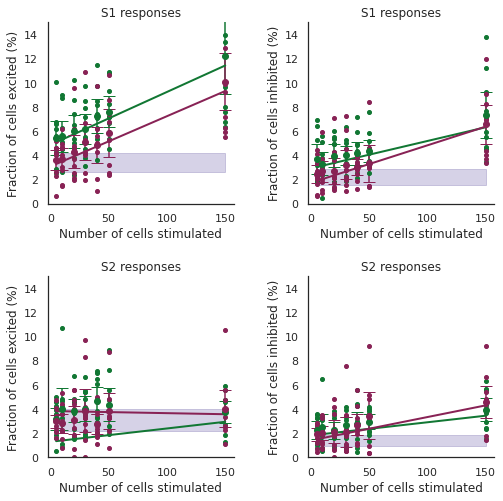

In [206]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
for i_reg, reg in enumerate(['s1', 's2']):
    for i_dir, direction in enumerate(['positive', 'negative']):
        pop.plot_transfer_function(dict_activ=perc_hit_dict[reg][direction], 
                                   plot_logscale=False, weighted_regression=True, 
                                   dict_var=var_perc_hit_dict[reg][direction],
                                   label='hit', ax=ax[i_reg][i_dir], plot_indiv_data=True)
        
        pop.plot_transfer_function(dict_activ=perc_miss_dict[reg][direction], 
                                   plot_logscale=False, weighted_regression=True, 
                                   dict_var=var_perc_miss_dict[reg][direction],
                                   label='miss', ax=ax[i_reg][i_dir], plot_indiv_data=True)
        
        pop.plot_spont(msm=msm, region=reg, direction=direction, ax=ax[i_reg][i_dir])
        
        ax[i_reg][i_dir].set_title(f'{reg.upper()} responses')
        if direction == 'positive':
            ax[i_reg][i_dir].set_ylabel('Fraction of cells excited (%)')
        elif direction == 'negative':
            ax[i_reg][i_dir].set_ylabel('Fraction of cells inhibited (%)')
        if reg == 's1':
            ax[i_reg][i_dir].set_ylim(0, 15)
        else:
            ax[i_reg][i_dir].set_ylim(0, 15)
            
        ax[i_reg][i_dir].set_xlabel('Number of cells stimulated')

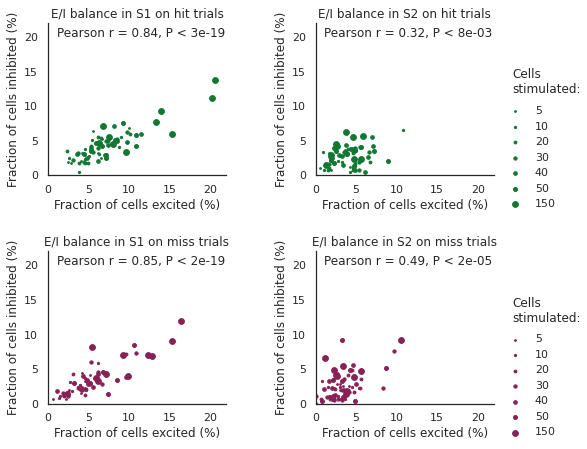

In [79]:
# perc_hit_dict
fig, ax = plt.subplots(2, 2, figsize=(8, 7), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

pop.plot_scatter_balance_stim(dict_activ_full=perc_hit_dict, 
                              ax_s1=ax[0][0], ax_s2=ax[0][1], tt='hit')

pop.plot_scatter_balance_stim(dict_activ_full=perc_miss_dict, 
                              ax_s1=ax[1][0], ax_s2=ax[1][1], tt='miss')

for i_row in [0, 1]:
    for i_col in [0, 1]:
        ax[i_row][i_col].set_xlim(0, 22)
        ax[i_row][i_col].set_ylim(0, 22)

In [139]:
session = msm.sessions[0]
session

instance Mouse J064, run 10 of Session class

In [140]:
(data_use_mat_norm, data_use_mat_norm_s1, data_use_mat_norm_s2, data_spont_mat_norm, ol_neurons_s1, ol_neurons_s2, outcome_arr,
        time_ticks, time_tick_labels, start_frame) = pop.normalise_raster_data(session=session, sort_neurons=False, filter_150_stim=False)
    

-0.06666666666666668 0.8
-0.06666666666666668 0.8
-0.06666666666666668 0.8
-0.06666666666666668 0.8


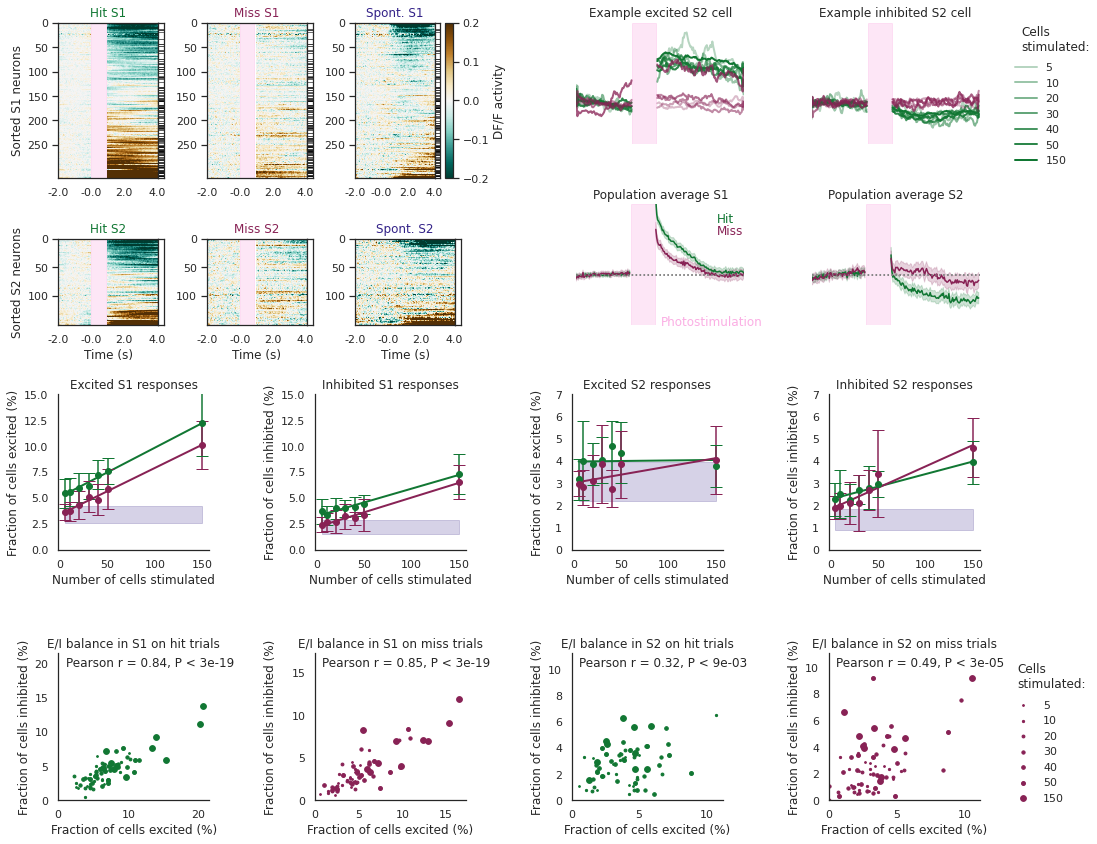

In [228]:
save_fig = True

fig = plt.figure(constrained_layout=False, figsize=(16, 12))
# gs_rasters_top = fig.add_gridspec(ncols=2, nrows=1, bottom=0.6, top=0.95, right=0.43, left=0.05,
#                               wspace=0.4, hspace=0.4)
ratio_rasters_s1 = np.sum(session.s1_bool) / len(session.s1_bool)
gs_rasters_top = fig.add_gridspec(ncols=3, nrows=1, bottom=0.77, top=0.95, right=0.4, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_rasters_bottom = fig.add_gridspec(ncols=3, nrows=1, bottom=0.6, top=0.7, right=0.4, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_example_cells = fig.add_gridspec(ncols=2, nrows=1, bottom=0.81, top=0.95, right=0.85, left=0.5,
                              wspace=0.4, hspace=0.4)
gs_pop_activity = fig.add_gridspec(ncols=2, nrows=1, bottom=0.6, top=0.74, right=0.85, left=0.5,
                              wspace=0.4, hspace=0.4)
gs_transfer = fig.add_gridspec(ncols=4, nrows=1, bottom=0.34, top=0.52, right=0.85, left=0.05,
                              wspace=0.7, hspace=0.4)
gs_balance = fig.add_gridspec(ncols=4, nrows=1, bottom=0.05, top=0.22, right=0.85, left=0.05,
                              wspace=0.7, hspace=0.4)

ax_raster = {}

## Rasters
## 2 rasters:
# for i_reg, reg in enumerate(['s1', 's2']):
#     ax_raster[reg] = {}
#     for i_x, xx in enumerate(['hit']):
#         ax_raster[reg][xx] = fig.add_subplot(gs_rasters_top[i_reg])
                
for i_reg, reg in enumerate(['s1', 's2']):
    ax_raster[reg] = {}
    for i_x, xx in enumerate(['hit', 'miss', 'spont']):
        if reg == 's1':
            ax_raster[reg][xx] = fig.add_subplot(gs_rasters_top[i_x])
        else:
            ax_raster[reg][xx] = fig.add_subplot(gs_rasters_bottom[i_x])
pop.plot_raster_plots_input_trial_types_one_session(session=session, ax_dict=ax_raster,
                                        filter_150_stim=False, imshow_interpolation='bilinear',
                                          sort_tt_list=['hit', 'miss', 'spont'], sorting_method='sum')
for i_reg, reg in enumerate(['s1', 's2']):
    for i_x, xx in enumerate(['hit', 'miss', 'spont']):
        if xx != 'hit':
            ax_raster[reg][xx].set_ylabel('')
        if reg == 's1':
            ax_raster[reg][xx].set_xlabel('')

## Example cells
cell_id_exc = 163 
cell_id_inh = 446
ax_example_cell = {xx: fig.add_subplot(gs_example_cells[xx]) for xx in range(2)}
for i_tt, tt in enumerate(['hit', 'miss']):
    _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax_example_cell[0], 
                             plot_title=False, plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True, filter_150_stim=False, #ylims=(-2, 2),
                             smooth_traces=True, plot_artefact=(tt == 'hit'))
    _ = pop.single_cell_plot(session, cell_id=cell_id_inh, tt=[tt], ax=ax_example_cell[1], 
                             plot_title=False, plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True, filter_150_stim=False, #ylims=(-0.7, 0.7),
                             smooth_traces=True, plot_artefact=(tt == 'hit'), 
                             plot_legend_n_cells=(tt == 'hit'))
assert session.s2_bool[cell_id_exc] and session.s2_bool[cell_id_inh]
ax_example_cell[0].set_title('Example excited S2 cell')
ax_example_cell[1].set_title('Example inhibited S2 cell')
    
## Population activity
ax_pop_activity = {xx: fig.add_subplot(gs_pop_activity[xx]) for xx in range(2)}
for n_cells in [[5, 10, 20, 30, 40, 50, 150]]:
    tmp = pop.plot_average_tt_s1_s2(msm, n_cells, #ylims=(-0.2, 0.2),
                                   ax_s1=ax_pop_activity[0], ax_s2=ax_pop_activity[1])
ax_pop_activity[0].set_title('Population average S1')
ax_pop_activity[1].set_title('Population average S2')
    
## Transfer function:
ax_transfer = {xx: fig.add_subplot(gs_transfer[xx]) for xx in range(4)}
i_ax = 0
for i_reg, reg in enumerate(['s1', 's2']):
    for i_dir, direction in enumerate(['positive', 'negative']):
        pop.plot_transfer_function(dict_activ=perc_hit_dict[reg][direction], 
                                   plot_logscale=False,
                                   label='hit', ax=ax_transfer[i_ax], plot_indiv_data=False)
        
        pop.plot_transfer_function(dict_activ=perc_miss_dict[reg][direction], 
                                   plot_logscale=False,
                                   label='miss', ax=ax_transfer[i_ax], plot_indiv_data=False)
        
        pop.plot_spont(msm=msm, region=reg, direction=direction, ax=ax_transfer[i_ax])
        if direction == 'positive':
            ax_transfer[i_ax].set_title(f'Excited {reg.upper()} responses')
        elif direction == 'negative':
            ax_transfer[i_ax].set_title(f'Inhibited {reg.upper()} responses')
        if direction == 'positive':
            ax_transfer[i_ax].set_ylabel('Fraction of cells excited (%)')
        elif direction == 'negative':
            ax_transfer[i_ax].set_ylabel('Fraction of cells inhibited (%)')
        if reg == 's1':
            ax_transfer[i_ax].set_ylim(0, 15)
        else:
            ax_transfer[i_ax].set_ylim(0, 7)
            
        ax_transfer[i_ax].set_xlabel('Number of cells stimulated')
        i_ax += 1
        
## Balance
ax_balance = {xx: fig.add_subplot(gs_balance[xx]) for xx in range(4)}
pop.plot_scatter_balance_stim(dict_activ_full=perc_hit_dict, plot_legend=False,
                              ax_s1=ax_balance[0], ax_s2=ax_balance[2], tt='hit')

pop.plot_scatter_balance_stim(dict_activ_full=perc_miss_dict, 
                              ax_s1=ax_balance[1], ax_s2=ax_balance[3], tt='miss')

for i_ax in range(1, 4):
    fig.align_ylabels(axs=[ax_transfer[i_ax], ax_balance[i_ax]])
fig.align_ylabels(axs=[ax_raster['s1']['hit'], ax_raster['s2']['hit'],  ax_transfer[i_ax], ax_balance[i_ax]])

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig2_v-six-rasters-including-150.pdf',
               bbox_inches='tight')